In [38]:
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, delaunay_plot_2d
import numpy as np

In [35]:
points = np.array([[0.25,0.25,0.25],
                   [0.75,0.72,0.25],
                   [0.25,0.75,0.75],
                   [0.75,0.25,0.75]])

In [40]:
points = np.array([[0.25,0.25],
                   [0.75,0.72],
                   [0.25,0.75]])

In [69]:
def include_point(p, pad_width):
    for x in p:
        if x < -pad_width:
            return False
        if x > 1.0 + pad_width:
            return False
    return True

def pad_points(points, pad_width):
    index_mapping = []
    included_points = []
    for i, p in enumerate(points):
        for shift in [[0,0],
                      [0,1],
                      [1,0],
                      [1,1],
                      [-1,0],
                      [-1,-1],
                      [0,-1],
                      [1,-1],
                      [-1,1]]:
            shifted_point = p+shift
            if include_point(shifted_point, pad_width):
                included_points.append(shifted_point)
                index_mapping.append(i)
    return np.array(included_points), index_mapping

In [70]:
ppoints = pad_points(points, 0.25)
ppoints

(array([[ 0.25,  0.25],
        [ 0.25,  1.25],
        [ 1.25,  0.25],
        [ 1.25,  1.25],
        [ 0.75,  0.72],
        [-0.25,  0.72],
        [ 0.25,  0.75],
        [ 1.25,  0.75],
        [ 0.25, -0.25],
        [ 1.25, -0.25]]), [0, 0, 0, 0, 1, 1, 2, 2, 2, 2])

In [73]:
def index_to_original(i, mapping):
    return mapping[i]

In [76]:
v_index_to_original = np.vectorize(index_to_original)

In [61]:
d = Delaunay(ppoints)

In [83]:
mapping = [0, 0, 0, 0, 1, 1, 2, 2, 2, 2]

In [87]:
d.simplices

array([[4, 0, 2],
       [6, 0, 4],
       [8, 0, 5],
       [0, 6, 5],
       [7, 4, 2],
       [4, 7, 3],
       [1, 4, 3],
       [1, 6, 4],
       [6, 1, 5],
       [9, 0, 8],
       [0, 9, 2]], dtype=int32)

In [86]:
n_simplices = d.simplices.shape[0]
np.array([mapping[i] for i in d.simplices.flatten()]).reshape(n_simplices,-1)

array([[1, 0, 0],
       [2, 0, 1],
       [2, 0, 1],
       [0, 2, 1],
       [2, 1, 0],
       [1, 2, 0],
       [0, 1, 0],
       [0, 2, 1],
       [2, 0, 1],
       [2, 0, 2],
       [0, 2, 0]])

In [77]:
ma

IndexError: invalid index to scalar variable.

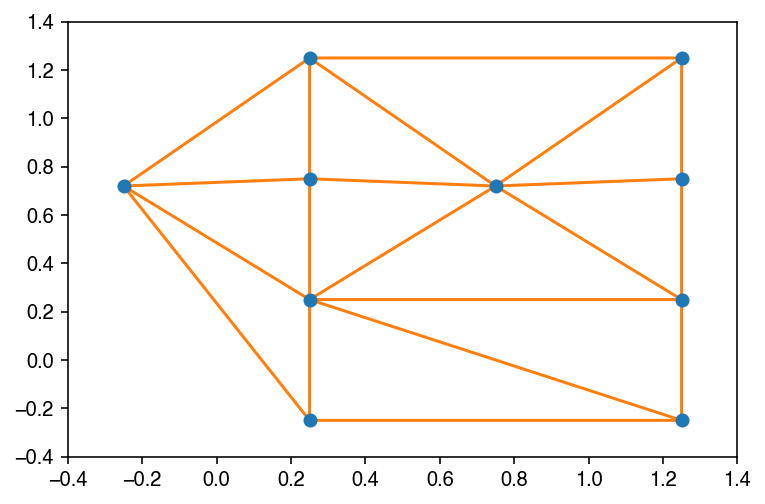

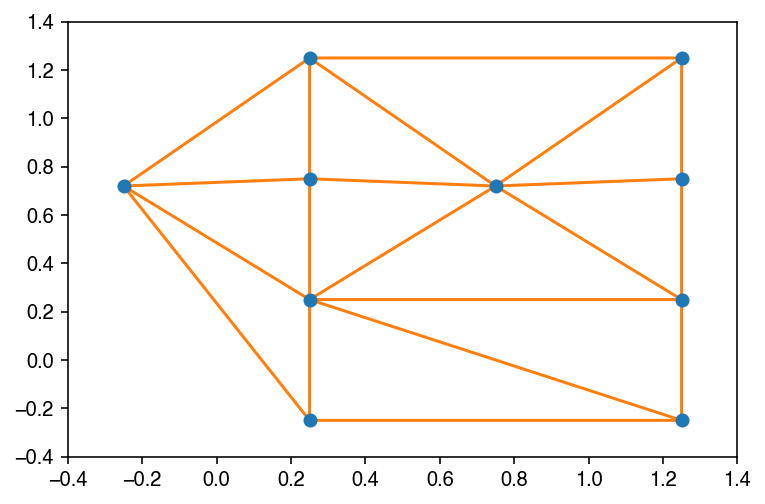

In [63]:
delaunay_plot_2d(d)

In [20]:
Voronoi?